# clas 7 : pie chart, bar chart, sunburst

In [3]:
pip install openpyxl

     |████████████████████████████████| 242 kB 3.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install seaborn

     |████████████████████████████████| 292 kB 3.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install plotly

     |████████████████████████████████| 25.3 MB 4.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px 

In [12]:
%ls


00_00_binder.ipynb                    Clase3.1.ipynb
00_00_primer_pasos.ipynb              Clase3.ipynb
01_01_data_types.ipynb                coches.csv
01_02_read_iloc_unique_groupby.ipynb  cwurData.csv
02_00_data_wrangling.ipynb            data.csv
02_01_null_display.ipynb              headbrain.csv
02_02_basic_math.ipynb                mic2.xlsx
adult.csv                             mic.xlsx
airline_data.csv                      movies.csv
antropometria00.csv                   nhanes_2015_2016.csv
antropometria-dataset.csv             Pivot_tables.ipynb
Book3.csv                             pokemon.csv
Canada.xlsx                           README.md
Cartwheeldata.csv                     requirements.txt
census.csv                            sample_pivot.csv
clase1.ipynb                          StudentsPerformance.csv
clase2.1_GestiondeDatos.ipynb         tips.csv
clase2.ipynb                          weight-height.csv


In [14]:
df = pd.read_excel('mic.xlsx',
                   engine = 'openpyxl'
                  )
df.head()

,Timestamp,Name,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
0,2021-09-24 11:41:37.540,Jobish Vallikavungal Devassia,31 - 40,Male,Research,">40, 000",5,5,5,4,...,4,4,Taste,No,NaN,"vanilla, lemon, and mint",Chocolate,More than one flavoured,agree,agree
1,2021-09-24 11:44:42.933,chikku,21 - 30,Male,student,"<10,000",3,5,3,4,...,4,4,Taste,No,Quanity issues,"vanilla, chocolate, and strawberry",Chocolate,More than one flavoured,neutral,neutral
2,2021-09-24 11:49:07.510,Dr Lillykutty Abraham,41 - 50,Female,Teaching,">40, 000",3,4,4,4,...,4,4,Taste,No,NaN,"vanilla, chocolate, and strawberry",Caramel,More than one flavoured,disagree,neutral
3,2021-09-24 21:49:47.576,Joshua,21 - 30,Male,Student,"<10,000",5,5,3,4,...,4,4,Taste,No,NaN,"vanilla, chocolate, and strawberry",Strawbery,More than one flavoured,agree,agree
4,2021-09-24 21:53:14.805,Aswathi,21 - 30,Female,Tutor,"10,000 - 20,000",5,5,4,4,...,5,5,Quality,No,NaN,"vanilla, chocolate, and strawberry",Vanila,single flavoured,agree,Strongly agree


In [15]:
counts = df['Age'].value_counts()
counts

21 - 30    37
<=20        6
31 - 40     4
41 - 50     3
Name: Age, dtype: int64

In [16]:
counts = df['Age'].value_counts()
type(counts)
counts = counts.to_frame()
type(counts)
counts

,Age
21 - 30,37
<=20,6
31 - 40,4
41 - 50,3


In [45]:
counts = df['Age'].value_counts()
type(counts)
counts = counts.to_frame()
type(counts)
counts
counts['%'] = (counts.iloc[:,:] /counts.loc[:, 'Age'].sum(axis = 0))*100
counts


,Age,%
21 - 30,37,74.0
<=20,6,12.0
31 - 40,4,8.0
41 - 50,3,6.0


In [46]:
counts = counts.reindex(['<=20','21 - 30','31 - 40', '41 - 50'])
counts.reset_index(inplace = True)
counts

,index,Age,%
0,<=20,6,12.0
1,21 - 30,37,74.0
2,31 - 40,4,8.0
3,41 - 50,3,6.0


In [47]:
counts = counts.rename({'index':'Age_group'}, axis = 1
                      )


In [48]:
counts


,Age_group,Age,%
0,<=20,6,12.0
1,21 - 30,37,74.0
2,31 - 40,4,8.0
3,41 - 50,3,6.0


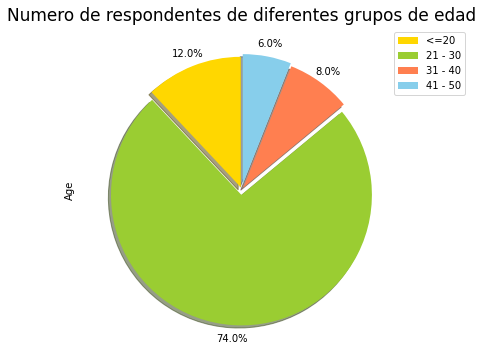

In [49]:
explode_list = [0.02, 0.04, 0.02, 0.04]
color_list = ['gold', 'yellowgreen', 'coral', 'skyblue']
counts['Age'].plot(kind = 'pie',
                   figsize = (15, 6),
                   startangle = 90,
                   shadow = True,
                   labels = None,
                   autopct = '%1.1f%%',
                   pctdistance = 1.1,
                   explode = explode_list,
                   colors = color_list,
                  )
plt.legend(labels = counts.Age_group,
          bbox_to_anchor = (0.95,1.0)
          )
plt.title('Numero de respondentes de diferentes grupos de edad', fontsize = 17,y = 1)
plt.show()


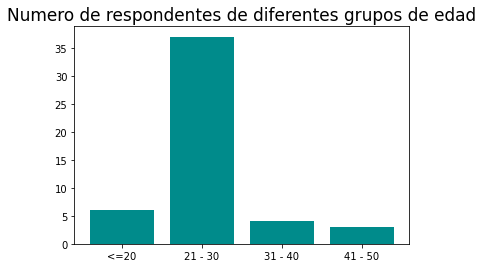

In [53]:
x = list(counts['Age_group'])
y = list(counts['Age'])
plt.bar(x, y, color = 'darkcyan')
plt.title('Numero de respondentes de diferentes grupos de edad', fontsize = 17,y = 1)
plt.show()

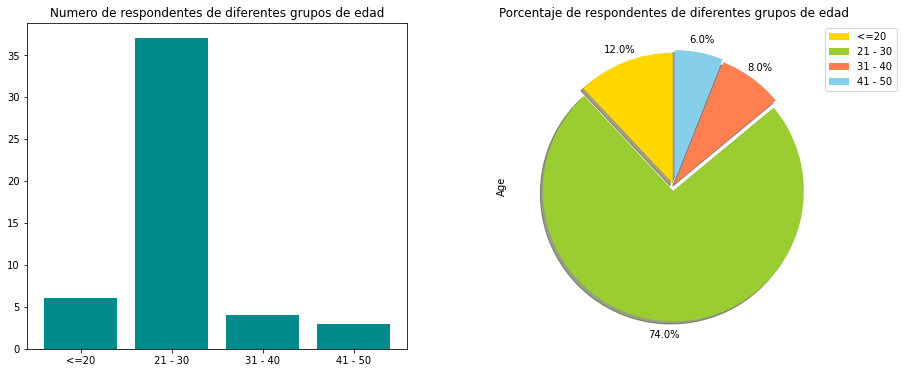

In [62]:
plt.subplot(1,2,2)

explode_list = [0.02, 0.04, 0.02, 0.04]
color_list = ['gold', 'yellowgreen', 'coral', 'skyblue']
counts['Age'].plot(kind = 'pie',
                   figsize = (15, 6),
                   startangle = 90,
                   shadow = True,
                   labels = None,
                   autopct = '%1.1f%%',
                   pctdistance = 1.1,
                   explode = explode_list,
                   colors = color_list,
                  )
plt.legend(labels = counts.Age_group,
          bbox_to_anchor = (0.95,1.0)
          )
plt.title('Porcentaje de respondentes de diferentes grupos de edad', fontsize = 12,y = 1)


plt.subplot(1,2,1)

x = list(counts['Age_group'])
y = list(counts['Age'])
plt.bar(x, y, color = 'darkcyan')
plt.title('Numero de respondentes de diferentes grupos de edad', fontsize = 12,y = 1)
plt.show()



In [63]:
df.columns

Index(['Timestamp', 'Name', 'Age', 'Sex', 'Ocupation', 'Monthly income ',
       'Price', 'Quality', 'Quantity', 'Availability', 'Taste', 'Flavours',
       'Customer relation', 'Customer services', 'Texture', 'Size',
       'Overal satisfaction', 'Consistency', 'Factor', 'Frowned', 'reason',
       'Popular ', 'My favorite', 'Kind', 'Preference', 'Recommend'],
      dtype='object')

In [68]:
age_genero = df.groupby(['Age', 'Sex']).size()
age_genero 

Age      Sex   
21 - 30  Female    15
         Male      22
31 - 40  Female     2
         Male       2
41 - 50  Female     2
         Male       1
<=20     Female     3
         Male       3
dtype: int64

In [72]:
age_genero_pivot = pd.pivot_table(index = ['Age','Sex'],
                                  aggfunc = len,
                                 data = df, values = 'Availability')
age_genero_pivot

Availability
Age     Sex                 
21 - 30 Female            15
        Male              22
31 - 40 Female             2
        Male               2
41 - 50 Female             2
        Male               1
<=20    Female             3
        Male               3

In [82]:
print(age_gender_pivot.columns)
age_gender = age_genero_pivot.rename(columns = {'Availability': 'Count'}
                                    )
age_gender['%'] = (age_gender.iloc[:,0] / age_gender.iloc[:,0].sum(axis = 0))*100
age_gender


Index(['Count'], dtype='object')


Count     %
Age     Sex                
21 - 30 Female     15  30.0
        Male       22  44.0
31 - 40 Female      2   4.0
        Male        2   4.0
41 - 50 Female      2   4.0
        Male        1   2.0
<=20    Female      3   6.0
        Male        3   6.0

In [85]:
df.columns

Index(['Timestamp', 'Name', 'Age', 'Sex', 'Ocupation', 'Monthly income ',
       'Price', 'Quality', 'Quantity', 'Availability', 'Taste', 'Flavours',
       'Customer relation', 'Customer services', 'Texture', 'Size',
       'Overal satisfaction', 'Consistency', 'Factor', 'Frowned', 'reason',
       'Popular ', 'My favorite', 'Kind', 'Preference', 'Recommend'],
      dtype='object')

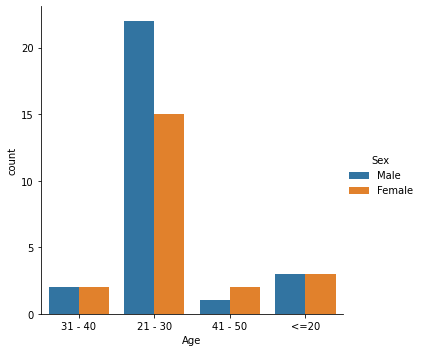

In [95]:
sns.catplot(x='Age',
            data = df,
            kind='count',
            hue='Sex'
           )
